In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_book  = pd.read_csv("./Book_data/new_data/Ratings_5.csv", sep = ' ')
groupMembe = pd.read_csv("./Book_data/KA_Book/moocgroupMember_u_v.csv",header=None,sep =' ')

In [4]:
user_book.sort_values(by = "User-ID")

,User-ID,ISBN,Book-Rating
1167,0,62,8
1168,0,63,8
1169,0,64,7
1170,0,66,6
1171,0,67,10
...,...,...,...
1162,10739,6950,7
1163,10739,4045,7
1164,10739,62091,7
1165,10739,53165,6


In [5]:
groupMembe

,0,1
0,0,"0,1,2,3,4"
1,1,"5,6,7,8,9"
2,2,"10,11,12,13"
3,3,"14,15,16,17"
4,4,"18,19,20,21,22"
...,...,...
2671,2671,"10717,10718,10719,10720,10721"
2672,2672,"10722,10723,10724,10725"
2673,2673,"10726,10727,10728,10729,10730"
2674,2674,"10731,10732,10733,10734,10735"


In [6]:
list_user = [int(i) for i in user_book['User-ID']]
list_book = [i for i in user_book['ISBN']]
list_rating = [i for i in user_book['Book-Rating']]

In [7]:
#  查找元素在列表中的下标
def find_in_list(myList,value):
    try:
        pos=[]
        for v in range(0,len(myList)):
            if value==myList[v]:
                pos.append(v)
        return pos
    except:
        print("find_in_list() Exception!")

In [8]:
find_in_list(list_book,10)

[6949,
 12799,
 57231,
 75113,
 98271,
 121508,
 138428,
 149726,
 161372,
 173846,
 187801,
 244194]

In [9]:
# a= [{1,2,3,4}, {1,6,8,4},{ 9,2,8,3}, {1,2,9,10}]
# group_video = set()
# for i in range(0,len(a)):
# #     group_v = a[i]
#     for j in range(i+1,len(a)):
#         group_two = a[i] & a[j]
#         group_video = group_two | group_video

# print(group_video)

# group_video = set()
# for i in range(0,len(a)):
#     for j in range(i+1,len(a)):
#         for k in range(j+1,len(a)):
#             group_two = a[i] & a[j] & a[k]
#             group_video = group_two | group_video

# print(group_video)

In [10]:
# 找出组成员> 8的物品作为组交互物品
Group_Video = []
for groupid,u in zip(groupMembe[0], groupMembe[1]):
    G_user = [int(i) for i in u.split(',')] 
    U_videos=[]
    U_rating = []
    
    Group_videos = {}
    for user in G_user:
        u_video = set()
        u_rating = set()
        index = find_in_list(list_user, user)
        for j in index:
            u_video.add(list_book[j])
            u_rating.add(list_rating[j])
        U_videos.append(u_video)
        U_rating.append(u_rating)
#     print(U_videos) 
    
#     group_video = set()
#     for i in range(0,len(U_videos)):   # 每个组成员交互过的book，找出评分大于8的作为组交互数据
#         for book, rating in zip(U_videos[i], U_rating[i]):
#             if rating > 8:
#                 group_video.add(book)
# -----------------------------------------------------
    group_video = set()
#     if len(U_videos) >=5:
#         for i in range(0,len(U_videos)):
#             for j in range(i+1,len(U_videos)):
#                 for k in range(j+1,len(U_videos)):
#                     group_two = U_videos[i] & U_videos[j] & U_videos[k]
#                     group_video = group_two | group_video
#     else:
    for i in range(0,len(U_videos)):
        for book, rating in zip(U_videos[i], U_rating[i]):
                if rating > 9:
                    group_video.add(book)
        for j in range(i+1,len(U_videos)):
            group_two = U_videos[i] & U_videos[j]
            group_video = group_two | group_video
#     if group_video != set():
#         print(groupid, group_video)


    Group_videos[groupid]=group_video
    Group_Video.append(Group_videos)
print(Group_Video[:10])

[{0: {78, 174, 133, 70}}, {1: {273, 307, 326}}, {2: {2465, 386}}, {3: {2955, 525, 519}}, {4: {643, 548, 684, 10894, 10905}}, {5: {1088, 742, 841, 817, 788}}, {6: {962, 999, 105706, 927, 1055}}, {7: {1089, 273, 1123}}, {8: {1176, 1281, 11013, 1207}}, {9: {1416, 11026}}]


In [11]:
count = 0
for i in range(len(Group_Video)): 
    if((Group_Video[i][i]) == set()):
        count+=1
#     else:
#          print((Group_Video[i][i]))
print(count)

print("非空组的数量", len(Group_Video) - count )

49
非空组的数量 2627


In [12]:
import random
# 打乱组序号的顺序
random.shuffle(Group_Video)

filename = './Book_data/KA_Book/my_group_book1.csv'
g_v = []
for dic in Group_Video:
    g_id = [i for i in dic.keys()]
    g_videos= [i for i in  dic.values()]
    for g_video in g_videos[0]:
        g_v.append((g_id[0], g_video))

random.shuffle(g_v)
with open(filename,'w') as object:
    for i in g_v:
        object.write(str(i[0])+" ")
        object.write(str(i[1])+"\n")  

In [14]:
#  找出组交互数据集合，便于抽负项
group_book = pd.read_csv("./Book_data/KA_Book/my_group_book1.csv",header=None,sep= ' ')
unq_g_v = set()

for group,book in zip(group_book[0],group_book[1]):
    unq_g_v.add((group,book))

In [15]:
group_book

,0,1
0,310,6120
1,2477,1358
2,381,2214
3,98,4699
4,1317,4381
...,...,...
7743,107,15948
7744,450,51465
7745,2556,50946
7746,2641,40776


In [16]:
len(unq_g_v)/ max(group_book[0])

2.896448598130841

In [17]:
#  平均每个组交互的数
# 60403/1297
15483 / 2674

5.790201944652207

##  EDA

In [20]:
group_interactions  = group_book[0].value_counts()
group_interactions_sorted = group_interactions.sort_values(ascending=False)
sorted_group_ids = group_interactions_sorted.index
sorted_interactions = group_interactions_sorted.values
sorted_interactions

array([31, 20, 20, ...,  1,  1,  1], dtype=int64)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


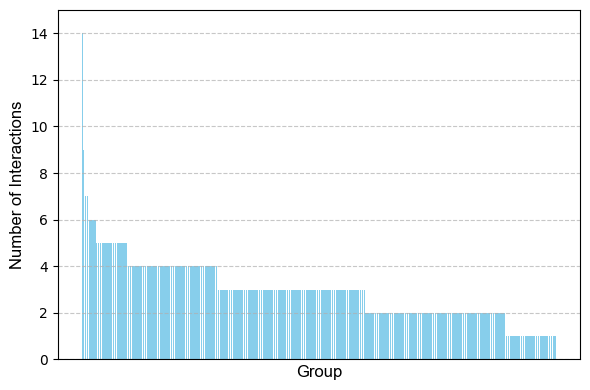

In [36]:
# 绘制柱状图

font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 12,
}

plt.figure(figsize=(6,4), dpi=100)
plt.bar(range(len(sorted_group_ids)), sorted_interactions, color='skyblue')
plt.xlabel('Group',font1)
plt.ylabel('Number of Interactions', font1)  
plt.ylim(0, 15)
# plt.title('Number of Interactions per User')
plt.xticks([])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('book_group_bar.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


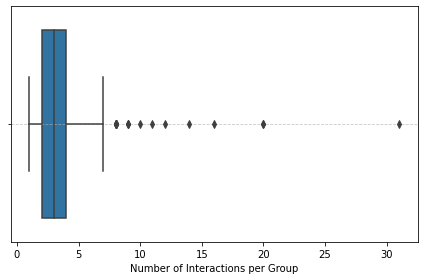

In [37]:
interactions_counts = group_interactions.values

# 绘制箱型图
plt.figure(figsize=(6, 4))
sns.boxplot(x=interactions_counts)
plt.xlabel('Number of Interactions per Group')
# plt.title('Distribution of Interactions per Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('book_group_box.eps', format='eps')
plt.show()

## The division of test set and training set

In [19]:
# 抽取测试机，训练集
GroupTrain = './Book_data/KA_Book/moocGroupTrain.csv'
GroupTest = './Book_data/KA_Book/moocGroupTest.csv'

with open(GroupTrain,'w') as object:
    for i in g_v[0:int(len(g_v)*0.90)]:
        object.write(str(i[0])+" ")
        object.write(str(i[1])+"\n")
        
with open(GroupTest,'w') as object:
    for i in g_v[int(len(g_v)*0.90):]:
        object.write(str(i[0])+" ")
        object.write(str(i[1])+"\n")   

In [20]:
moocGroupTest = pd.read_csv("./Book_data/KA_Book/moocGroupTest.csv", header = None, sep=" ")
user_book["ISBN"].max()    # 111335
moocGroupTest[:5]

,0,1
0,2272,79723
1,2486,6355
2,2407,2826
3,2477,22010
4,1479,2414


In [21]:
f = open('./Book_data/KA_Book/moocGroupNegative.csv','w',encoding='utf-8')
for user,video in zip(moocGroupTest[0],moocGroupTest[1]):
    text_p = []
    text_p.append((user,video))
    for i in str(text_p[0]):
        if i != ' ':
            f.write(i)
    for i in range(99):
        f.write(' ')
        j = np.random.randint(0,user_book["ISBN"].max() + 1)
        while (user,j) in unq_g_v: # or j in video_vain
            j = np.random.randint(0, user_book["ISBN"].max() + 1)
        f.write(str(j))
    f.write('\n')
f.close()